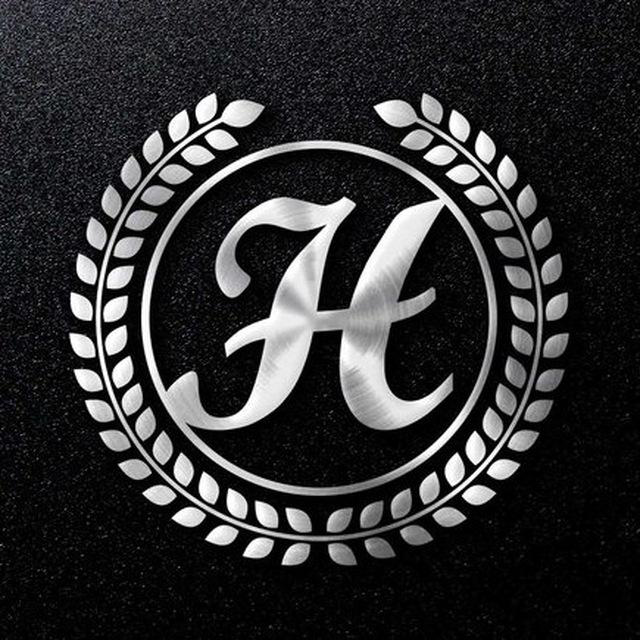

The type of the image is <class 'PIL.JpegImagePlugin.JpegImageFile'>


(PIL.JpegImagePlugin.JpegImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [0]:
#get python image librart
import PIL
from PIL import Image

#Displaying Image File
from IPython.display import display

# accepting the image from User
from google.colab import files
#uploaded = files.upload()

#loading the image
file="hyembosslogo.jpg" #uploaded file name hardcoded
image=Image.open(file)
display(image)


#inspect the file type
import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))

#convert the image to RGB if it is from CMYK
image=image.convert('RGB')


In [0]:
import PIL
from PIL import Image
from PIL import ImageEnhance


# accepting the image from User
from google.colab import files
#uploaded = files.upload()

#loading the image
file="hyembosslogo.jpg" #uploaded file name hardcoded
image=Image.open(file)
display(image)

# read image and convert to RGB
image=Image.open(file)
image=image.convert('RGB')

#or example, splitting an “RGB” image creates three new images each containing a copy of one of the original bands (red, green, blue).
source=image.split()
display(source[0])
display(source[1])
display(source[2])



In [0]:
import PIL
from PIL import Image
from PIL import ImageEnhance


# accepting the image from User
from google.colab import files
#uploaded = files.upload()

#loading the image
file="hyembosslogo.jpg" #uploaded file name hardcoded
image=Image.open(file)
display(image)

# read image and convert to RGB
image=Image.open(file)
image=image.convert('RGB')


#or example, splitting an “RGB” image creates three new images each containing a copy of one of the original bands (red, green, blue).
source=image.split()

print(source)

#Since RGB Images it 3 images with each having 3 channel of data in tuple  
#Select an images and multiply all its value by a number 
# .point is for to work on each individual pixel of the images
mid=source[0].point(lambda x:x*0.1)


# .paste is used to paste 1 image onto another
#source[0].paste(mid)
source[i].paste(mid)

#.merge combine back all the split image channels back into the defined mode
im = Image.merge(image.mode, source)


display(im)


Saving hyembosslogo.jpg to hyembosslogo.jpg


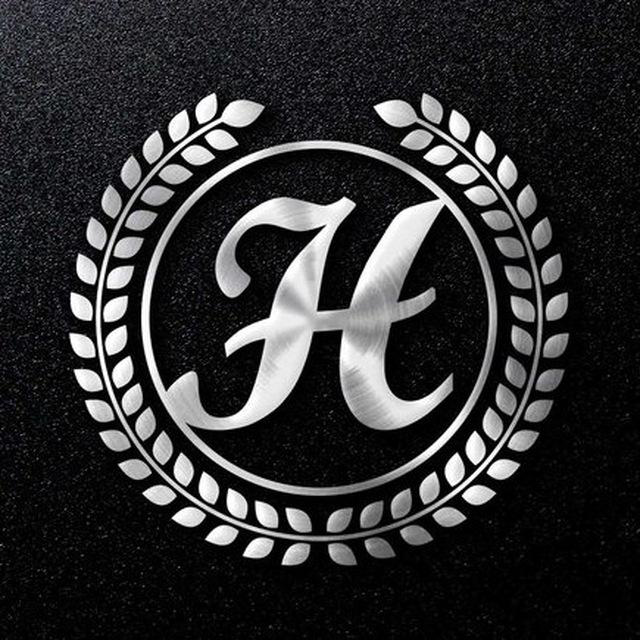

channel 0 intensity 0.1
channel 0 intensity 0.5
channel 0 intensity 0.9
channel 1 intensity 0.1
channel 1 intensity 0.5
channel 1 intensity 0.9
channel 2 intensity 0.1
channel 2 intensity 0.5
channel 2 intensity 0.9


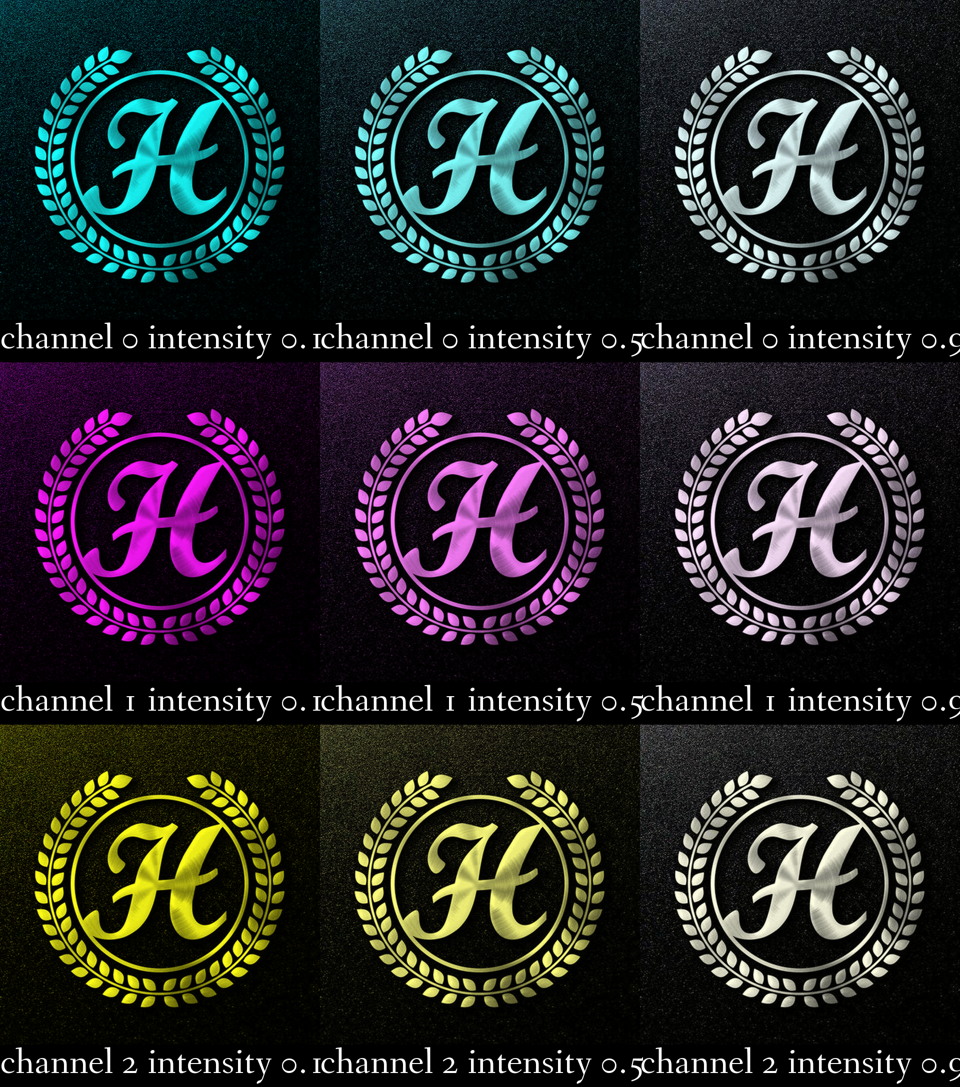

In [3]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont



# accepting the image from User
from google.colab import files
uploaded = files.upload()

#loading the image
file="hyembosslogo.jpg" #uploaded file name hardcoded
image=Image.open(file)
display(image)

# read image and convert to RGB
image=Image.open(file)
image=image.convert('RGB')

images=[]
lables=[]

for i in range(3):
    for j in (0.1,0.5,0.9):
        
        #or example, splitting an “RGB” image creates three new images each containing a copy of one of the original bands (red, green, blue).
        source=image.split()


        #Since RGB Images it 3 images with each having 3 channel of data in tuple  
        #Select an images and multiply all its value by a number 
        # .point is for to work on each individual pixel of the images
        mid=source[i].point(lambda x:x*j)


        # .paste is used to paste 1 image onto another
        source[i].paste(mid)


        im = Image.merge(image.mode, source)

        #adding a text label to the image
        lables.append('channel {} intensity {}'.format(i,j))
        print(lables[-1])
        #pasting the image one next to another
        images.append(im)
        #display(im)
        
#defining the font type and font size
font = ImageFont.truetype("fanwood-webfont.ttf",75)


#extract from image 1 from image list
first_image=images[0]

# create a new image of 3X3 with border in bottom to write text
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3+3*85))

#display the contact sheet
#display(contact_sheet)

#defining the initial coordinaates
x=0
y=0

#drawing an canvas on top of contact sheet
draw = ImageDraw.Draw(contact_sheet)

#for all individual Images
for i,img in enumerate(images):
    
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    
    #writing the text below the image
    draw.text((x,y+first_image.height+5), lables[i], font=font)
    
    
    
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height+85
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)




In [0]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont


# read image and convert to RGB
source_img=Image.open("readonly/msi_recruitment.gif")
source_img=image.convert('RGB')

# get a font
fnt = ImageFont.truetype('readonly/fanwood-webfont.ttf', 75)

#------------------------------------------------------------

# create a contact sheet from different brightnesses
contact_sheet=PIL.Image.new(image.mode, (source_img.width*3,(source_img.height+100)*3))
x=0
y=0
channels  = [0,1,2]
factors   = [0.1, 0.5, 0.9]

for channel in channels:
    for factor in factors:
        # build your new img
        # build the text in an image called box
        box = Image.new('RGB',(source_img.width,100),'black')
        draw = ImageDraw.Draw(box)
        draw.text((20, 20), "Channel {} intensity {}".format(channel,factor), font=ImageFont.truetype("readonly/fanwood-webfont.ttf",75))

        # generate an image to contain source image and box 
        img = Image.new('RGB',(source_img.width,source_img.height + 100))

        # paste the content 
        img.paste(source_img) 
        img.paste(box,(0,source_img.height)) 

        # now we will split the image in its three channels
        red, green, blue = img.split()
        
        # and generate the enahnce objects for each channel
        enh_red   = ImageEnhance.Brightness(red)
        enh_green = ImageEnhance.Brightness(green)
        enh_blue  = ImageEnhance.Brightness(blue)
        
        # we'll now apply the wanted factor, depending on the 3x3 grid position
        # this is quaick workaround, can be done much better probably
        if channel == 0 : 
            new_red = enh_red.enhance(factor)
            new_green = green
            new_blue  = blue
        if channel == 1 : 
            new_red = red
            new_green = enh_green.enhance(factor)
            new_blue = blue
        if channel == 2 : 
            new_red = red
            new_green = green
            new_blue   = enh_blue.enhance(factor)
        
        new_img = Image.merge(img.mode, (new_red, new_green, new_blue))
        
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(new_img, (x, y) )
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+source_img.width == contact_sheet.width:
            x=0
            y=y+source_img.height+100
        else:
            x=x+source_img.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)